ADS Assignment 3
Problem Statement: House Price Prediction
Description:- House price prediction is a common problem in the real estate industry and 
involves predicting the selling price of a house based on various features and attributes. The 
problem is typically approached as a regression problem, where the target variable is the price 
of the house, and the features are various attributes of the house 
The features used in house price prediction can include both quantitative and categorical 
variables, such as the number of bedrooms, house area, bedrooms, furnished, nearness to 
main road, and various amenities such as a garage and other factors that may influence the 
value of the property.
Accurate predictions can help agents and appraisers price homes correctly, while 
homeowners can use the predictions to set a reasonable asking price for their properties. 
Accurate house price prediction can also be useful for buyers who are looking to make 
informed decisions about purchasing a property and obtaining a fair price for their 
investment.
Attribute Information:
Name - Description
1- Price-Prices of the houses
2- Area- Area of the houses
3- Bedrooms- No of house bedrooms
4- Bathrooms- No of bathrooms
5- Stories- No of house stories
6- Main Road- Weather connected to Main road
7- Guestroom-Weather has a guest room
8- Basement-Weather has a basement
9- Hot water heating- Weather has a hot water heater
10-Airconditioning-Weather has a air conditioner
11-Parking- No of house parking
12-Furnishing Status-Furnishing status of house
Building a Regression Model
1. Download the dataset: Dataset
2. Load the dataset into the tool.
3. Perform Below Visualizations.
 Univariate Analysis
 Bi-Variate Analysis
 Multi-Variate Analysis
4. Perform descriptive statistics on the dataset.
5. Check for Missing values and deal with them.
6. Find the outliers and replace them outliers
7. Check for Categorical columns and perform encoding.
8. Split the data
into dependent and independent variables. 
9. Scale the independent
variables
10. Split the data into training and testing
11. Build the Model
12. Train the Model
13. Test the Model
14. Measure the performance using Metrics.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder

In [4]:
# Step 2: Load the dataset into the tool
df = pd.read_csv('Housing.csv')

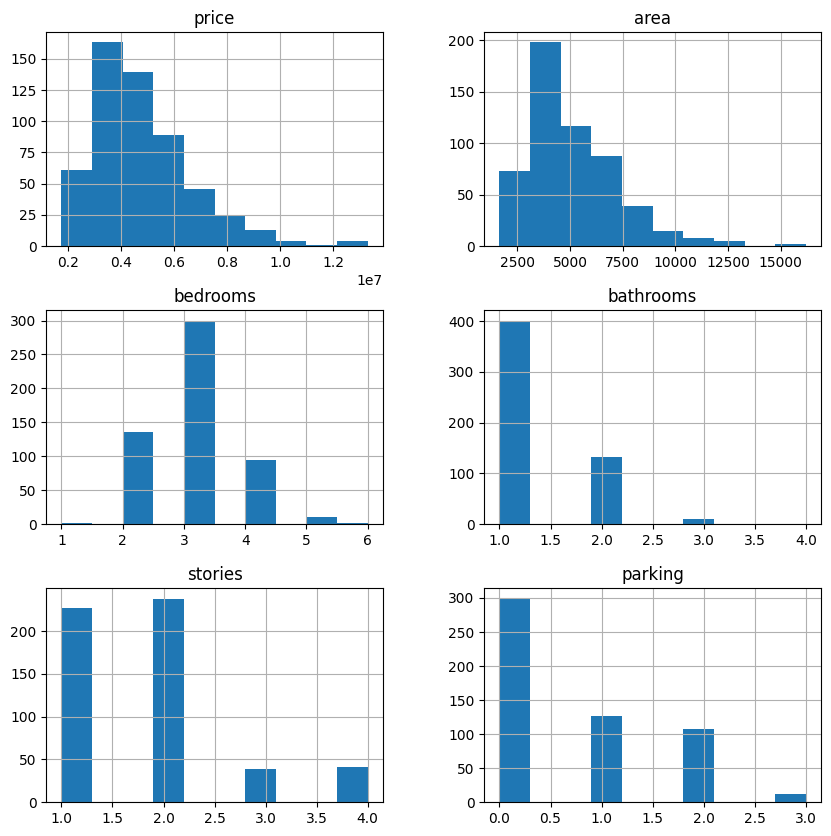

In [5]:
# Step 3a: Univariate Analysis
df.hist(figsize=(10, 10))
plt.show()

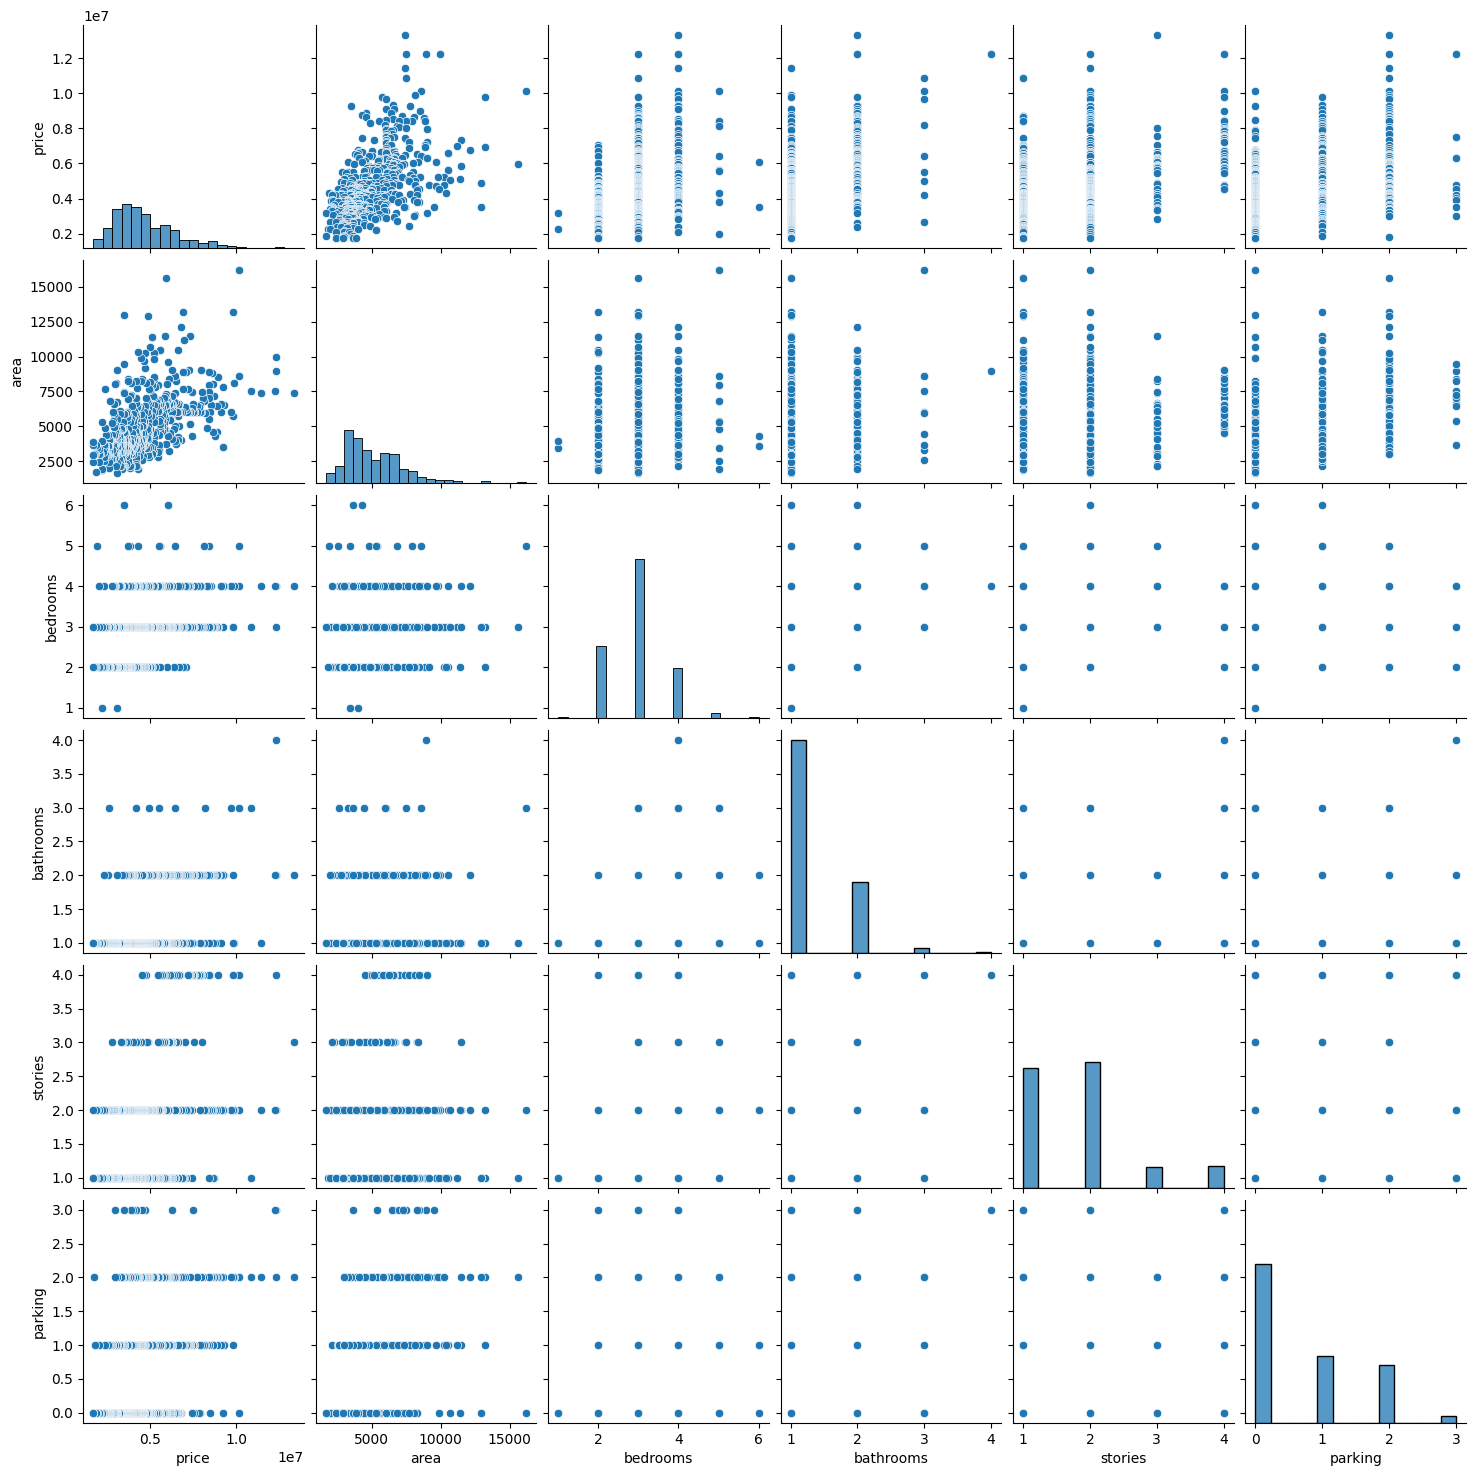

In [6]:
# Step 3b: Bi-Variate Analysis
sns.pairplot(df)
plt.show()

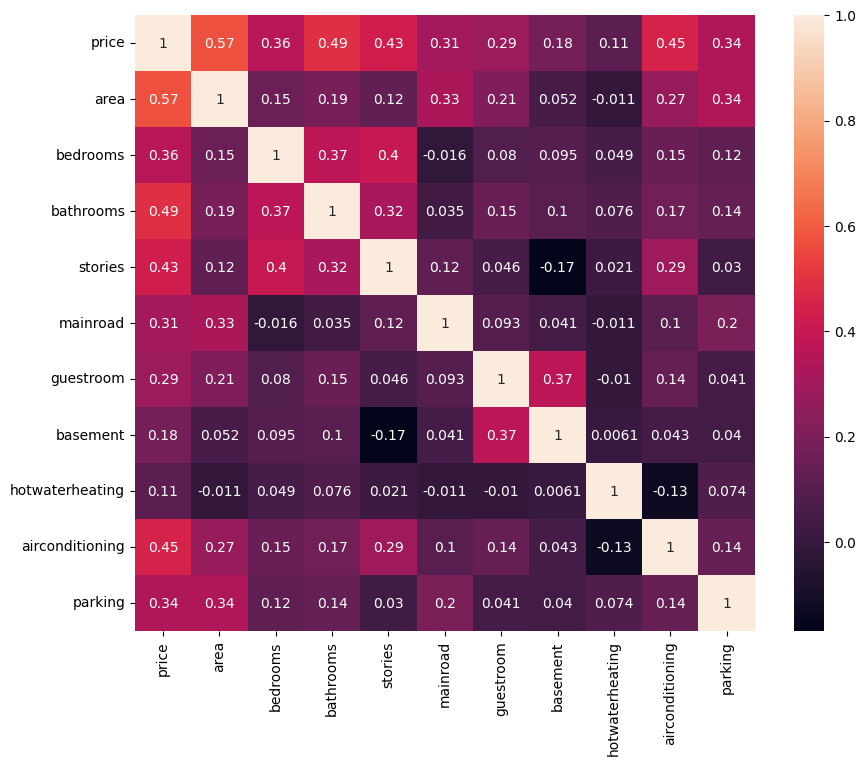

In [19]:
# Step 3c: Multi-Variate Analysis
numeric_cols = df.select_dtypes(include=np.number).columns
corr = df[numeric_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True)
plt.show()


In [8]:
# Step 4: Perform descriptive statistics
statistics = df.describe()
print(statistics)

              price          area    bedrooms   bathrooms     stories   
count  5.450000e+02    545.000000  545.000000  545.000000  545.000000  \
mean   4.766729e+06   5150.541284    2.965138    1.286239    1.805505   
std    1.870440e+06   2170.141023    0.738064    0.502470    0.867492   
min    1.750000e+06   1650.000000    1.000000    1.000000    1.000000   
25%    3.430000e+06   3600.000000    2.000000    1.000000    1.000000   
50%    4.340000e+06   4600.000000    3.000000    1.000000    2.000000   
75%    5.740000e+06   6360.000000    3.000000    2.000000    2.000000   
max    1.330000e+07  16200.000000    6.000000    4.000000    4.000000   

          parking  
count  545.000000  
mean     0.693578  
std      0.861586  
min      0.000000  
25%      0.000000  
50%      0.000000  
75%      1.000000  
max      3.000000  


In [9]:
# Step 5: Check for Missing values and deal with them
missing_values = df.isnull().sum()
print(missing_values)

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
furnishingstatus    0
dtype: int64


In [10]:
#  Step 6: Find the outliers and replace them
# Assuming 'Price' is the target variable, we can remove outliers using z-score
z_scores = np.abs((df['price'] - df['price'].mean()) / df['price'].std())
df = df[z_scores < 3]  # Remove data points with z-score > 3

In [11]:
# Step 7: Check for Categorical columns and perform encoding
categorical_cols = ['area','bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement','hotwaterheating','airconditioning','parking']
label_encoder = LabelEncoder()
for col in categorical_cols:
    df.loc[:, col] = label_encoder.fit_transform(df.loc[:, col])

In [12]:
# Step 8: Split the data into dependent and independent variables
X = df.drop('price', axis=1)
y = df['price']

In [13]:
# Step 9: Scale the independent variables
scaler = StandardScaler()

# Separate the categorical column 'Furnishing Status'
furnishing_status = df['furnishingstatus']

# Drop the 'Furnishing Status' column from the independent variables
X = df.drop(['price', 'furnishingstatus'], axis=1)

# Scale the remaining independent variables
X_scaled = scaler.fit_transform(X)

# Concatenate the scaled independent variables with the encoded 'Furnishing Status'
X_scaled = np.concatenate((X_scaled, furnishing_status.values.reshape(-1, 1)), axis=1)


In [14]:
# Step 10: Split the data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [15]:
# Step 11: Build the Model
model = LinearRegression()

In [16]:
# Step 7: Check for Categorical columns and perform encoding
categorical_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'furnishingstatus']
label_encoder = LabelEncoder()
for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])

# Perform one-hot encoding for 'furnishingstatus'
df = pd.get_dummies(df, columns=['furnishingstatus'], drop_first=True)

# Step 12: Train the Model
X = df.drop('price', axis=1)
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [17]:
# Step 13: Test the Model
y_pred = model.predict(X_test)

In [24]:
# Step 14: Measure the performance using Metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)

Mean Squared Error: 1076061795647.3593
Root Mean Squared Error: 1037333.9846198809
R-squared: 0.7193925178374059
